In [24]:
import pymongo
import xarray_mongodb
import bson
import datetime

# datetime.datetime.utcnow()

In [25]:
mongoClient = pymongo.MongoClient()
mongoDB = mongoClient.testDB
mongoCollection = mongoDB.testCollection

In [26]:
from time import sleep
from multiprocessing.pool import ThreadPool
 
# task executed in a worker thread
def task():
    # report a message
    print(f'Task executing\n')
    # block for a moment
    sleep(1)
    # report a message
    print(f'Task done\n')
    
def task2():
    # report a message
    print(f'Task2 executing \n')
    # block for a moment
    sleep(1)
    # report a message
    print(f'Task2 done\n')
 
# protect the entry point
if __name__ == '__main__':
    # create and configure the thread pool
    pool = ThreadPool()
    # issue tasks to the thread pool
    pool.apply_async(task)
    pool.apply_async(task2)
    # close the thread pool
    pool.close()
    # wait for all tasks to finish
    pool.join()

Task executing

Task2 executing 

Task done
Task2 done




# Import supporting package

In [27]:
import xarray as xr
import pandas as pd
import numpy as np
import copy

import glob

import xrft
import finufft

from uncertainties import ufloat
from uncertainties import unumpy as unp
from uncertainties import umath

from datetime import datetime

import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 18

from DataContainer.ReadData import read_hdf5_file, read_hdf5_global, read_hdf5_run_time, read_csv_file
from Analyser.ImagingAnalyser import ImageAnalyser
from Analyser.FitAnalyser import FitAnalyser
from Analyser.FitAnalyser import ThomasFermi2dModel, DensityProfileBEC2dModel, Polylog22dModel
from Analyser.FFTAnalyser import fft, ifft, fft_nutou
from ToolFunction.ToolFunction import *

from ToolFunction.HomeMadeXarrayFunction import errorbar, dataarray_plot_errorbar
xr.plot.dataarray_plot.errorbar = errorbar
xr.plot.accessor.DataArrayPlotAccessor.errorbar = dataarray_plot_errorbar

imageAnalyser = ImageAnalyser()

# Import supporting package

In [28]:
import xarray as xr
import numpy as np

from uncertainties import ufloat
from uncertainties import unumpy as unp
from uncertainties import umath

import matplotlib.pyplot as plt

from DataContainer.ReadData import read_hdf5_file
from Analyser.ImagingAnalyser import ImageAnalyser
from Analyser.FitAnalyser import FitAnalyser
from Analyser.FitAnalyser import ThomasFermi2dModel, DensityProfileBEC2dModel, Polylog22dModel
from Analyser.FitAnalyser import NewFitModel
from ToolFunction.ToolFunction import *

from ToolFunction.HomeMadeXarrayFunction import errorbar, dataarray_plot_errorbar
xr.plot.dataarray_plot.errorbar = errorbar
xr.plot.accessor.DataArrayPlotAccessor.errorbar = dataarray_plot_errorbar

imageAnalyser = ImageAnalyser()

## Start a client for parallel computing

In [29]:
from dask.distributed import Client
client = Client(n_workers=6, threads_per_worker=10, processes=True, memory_limit='10GB')
client

C:\Users\data\AppData\Roaming\Python\Python39\site-packages\distributed\node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 53497 instead
  warnings.warn(


<Client: 'tcp://127.0.0.1:53498' processes=6 threads=60, memory=55.88 GiB>

## Set global path for experiment

In [30]:
# filepath = "//DyLabNAS/Data/Evaporative_Cooling/2023/05/03/0043/*.h5"
# filepath = "//DyLabNAS/Data/Evaporative_Cooling/2023/04/18/0003/2023-04-18_0003_Evaporative_Cooling_000.h5"

# filepath = "//DyLabNAS/Data/Repetition_scan/2023/04/21/0002/*.h5"

# filepath = r"./testData/0002/*.h5"

# filepath = r"./testData/0002/2023-04-21_0002_Evaporative_Cooling_0.h5"

# filepath = r'd:/Jianshun Gao/Simulations/analyseScripts/testData/0002/2023-04-21_0002_Evaporative_Cooling_0.h5'

# filepath = "//DyLabNAS/Data/Evaporative_Cooling/2023/04/18/0003/*.h5"

# filepath = "//DyLabNAS/Data/Evaporative_Cooling/2023/05/04/0000/*.h5"

filepath = './result_from_experiment/2023-04-24/0013/2023-04-24_0013_Evaporative_Cooling_08.h5'

In [31]:
groupList = [
    "images/MOT_3D_Camera/in_situ_absorption",
    "images/ODT_1_Axis_Camera/in_situ_absorption",
    "images/ODT_2_Axis_Camera/in_situ_absorption",
]

dskey = {
    "images/MOT_3D_Camera/in_situ_absorption": "camera_1",
    "images/ODT_1_Axis_Camera/in_situ_absorption": "camera_2",
    "images/ODT_2_Axis_Camera/in_situ_absorption": "camera_3",
}


In [32]:
img_dir = '//DyLabNAS/Data/'
SequenceName = "Evaporative_Cooling" + "/"
folderPath = img_dir + SequenceName + '2023/05/23'# get_date()

In [56]:
filePath = './NewFile.csv'
data = read_csv_file(filePath)
remove_bad_shots(data, index=0)
data = data.astype(float)
data

<xarray.Dataset>
Dimensions:     (fileIndex: 1, index: 1201)
Coordinates:
  * index       (index) int64 0 1 2 3 4 5 6 ... 1195 1196 1197 1198 1199 1200
Dimensions without coordinates: fileIndex
Data variables:
    X           (fileIndex, index) float64 nan 0.0 1.0 ... 1.198e+03 1.199e+03
    CH1         (fileIndex, index) float64 nan -0.08 -0.08 ... 3.28 -5.52 9.68
    CH2         (fileIndex, index) float64 nan 0.0 0.0 ... 0.008 -0.276 -0.128
    Start       (fileIndex, index) float64 nan nan nan nan ... nan nan nan nan
    Increment   (fileIndex, index) float64 nan nan nan nan ... nan nan nan nan
    Unnamed: 5  (fileIndex, index) float64 nan nan nan nan ... nan nan nan nan

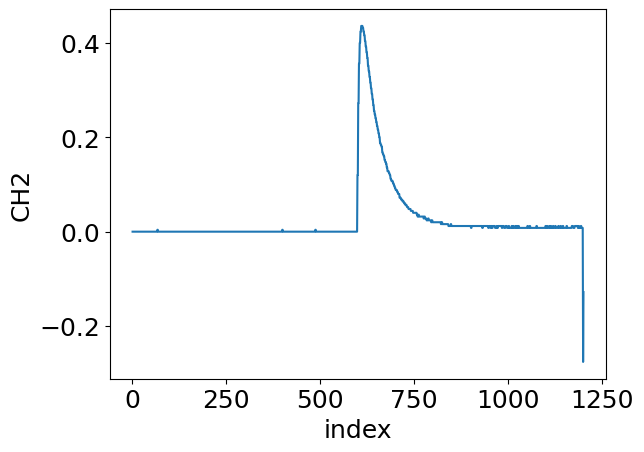

In [57]:
fig = plt.figure()
ax = fig.gca()

data.isel(fileIndex=0).CH2.plot(ax=ax)
plt.xlim()
plt.xlim()

plt.show()

# An example for one experimental run

## Load the data

In [ ]:
shotNum = "0069"
filePath = folderPath + "/" + shotNum + "/*.h5"
# filePath = "//DyLabNAS/Data/Evaporative_Cooling/2023/05/12/0065/*.h5"
filePath = './result_from_experiment/2023-04-24/0013/2023-04-24_0013_Evaporative_Cooling_08.h5'

dataSetDict = {
    dskey[groupList[i]]: read_hdf5_file(filePath, groupList[i])
    for i in [0] # range(len(groupList))
}

dataSet = dataSetDict["camera_1"]
dataSet = swap_xy(dataSet)

scanAxis = get_scanAxis(dataSet)

dataSet = auto_rechunk(dataSet)

dataSet = imageAnalyser.get_absorption_images(dataSet)

dataSet

## Calculate an plot OD images

In [ ]:
# imageAnalyser.center = (960, 1040)
# imageAnalyser.span = (100, 100)
# imageAnalyser.fraction = (0.1, 0.1)

imageAnalyser.center = (960, 875)
imageAnalyser.span = (300, 300)
imageAnalyser.fraction = (0.1, 0.1)

dataSet_cropOD = imageAnalyser.crop_image(dataSet.OD)
dataSet_cropOD = imageAnalyser.substract_offset(dataSet_cropOD).load()

dataSet_cropOD.plot.pcolormesh(cmap='jet', vmin=0, col=scanAxis[0], row=scanAxis[1])
plt.show()

## Do a 2D two-peak gaussian fit to the OD images

### Do the fit

In [ ]:
from Analyser.FitAnalyser import ThomasFermi2dModel, DensityProfileBEC2dModel, polylog2_2d

fitModel = DensityProfileBEC2dModel()
# fitModel = ThomasFermi2dModel()

fitAnalyser = FitAnalyser(fitModel, fitDim=2)

# fitAnalyser = FitAnalyser("Gaussian-2D", fitDim=2)

# dataSet_cropOD = dataSet_cropOD.chunk((1,1,100,100))

params = fitAnalyser.guess(dataSet_cropOD, guess_kwargs=dict(pureBECThreshold=0.3), dask="parallelized")
fitResult = fitAnalyser.fit(dataSet_cropOD, params).load()

In [ ]:
params.compute().item()

In [ ]:
fitCurve = fitAnalyser.eval(fitResult, x=np.arange(300), y=np.arange(300), dask="parallelized").load()

fitCurve.plot.pcolormesh(cmap='jet', vmin=0, col=scanAxis[0], row=scanAxis[1])

In [ ]:
fitModel2 = Polylog22dModel(prefix='thermal_')
fitAnalyser2 = FitAnalyser(fitModel2, fitDim=2)
fitCurve2 = fitAnalyser2.eval(fitResult, x=np.arange(100), y=np.arange(100), dask="parallelized").load()

fitModel3 = ThomasFermi2dModel(prefix='BEC_')
fitAnalyser3 = FitAnalyser(fitModel3, fitDim=2)
fitCurve3 = fitAnalyser3.eval(fitResult, x=np.arange(100), y=np.arange(100), dask="parallelized").load()

In [ ]:
fig = plt.figure()
ax = fig.gca()

dataSet_cropOD.sum(dim='x').plot(ax=ax, col=scanAxis[0], row=scanAxis[1])
fitCurve.sum(dim='x').plot(ax=ax, col=scanAxis[0], row=scanAxis[1])
fitCurve2.sum(dim='x').plot(ax=ax, col=scanAxis[0], row=scanAxis[1])
fitCurve3.sum(dim='x').plot(ax=ax, col=scanAxis[0], row=scanAxis[1])

plt.show()

fig = plt.figure()
ax = fig.gca()

dataSet_cropOD.sum(dim='y').plot(ax=ax, col=scanAxis[0], row=scanAxis[1])
fitCurve.sum(dim='y').plot(ax=ax, col=scanAxis[0], row=scanAxis[1])
fitCurve2.sum(dim='y').plot(ax=ax, col=scanAxis[0], row=scanAxis[1])
fitCurve3.sum(dim='y').plot(ax=ax, col=scanAxis[0], row=scanAxis[1])

plt.show()

In [ ]:
value = fitAnalyser.get_fit_full_result(fitResult)

In [ ]:
value

In [ ]:
xdb = xarray_mongodb.XarrayMongoDB(mongoDB)

In [ ]:
value = fitAnalyser.get_fit_value(fitResult)
value

In [ ]:
dataSet_cropOD

In [ ]:
dataSet_cropOD.attrs['name'] = 'name'

In [ ]:
_id, _ = xdb.put(dataSet_cropOD)

In [ ]:
_id

In [ ]:
# _id = '646e3cbbdb91e17db4b4cbd2'

In [ ]:
xdb.get(_id)

In [ ]:
c = bson.objectid.ObjectId('646e4919802812f029b385d7')
c

In [ ]:
xdb.get(c)

In [ ]:
import datetime
post = {"author": "Mike",
        "data_id": _id,
        "tags": ["mongodb", "python", "pymongo"],
        "date": datetime.datetime.utcnow()}

In [ ]:
posts = mongoCollection
post_id = posts.insert_one(post).inserted_id
post_id

In [ ]:
 for i in posts.find({'_id': bson.objectid.ObjectId('646e45a4802812f029b385d6')}):
     print(i)

In [ ]:
import gridfs

fs = gridfs.GridFS(mongoDB, 'xarray')

In [ ]:
fs.put(b"hello world")

In [ ]:
c = bson.objectid.ObjectId('646e4919802812f029b385d7')

fs.get(_id)

In [ ]:
np.sqrt(np.sum([0.061**2, 0.334**2, 0.447**2]))